<div>
<img img class="logo" src="https://medialib.cmcdn.dk/medialibrary/51432DDB-BBE3-4327-85F4-BE3493077470/1D874B35-F493-EC11-84B2-00155D0B0901.png" style="width: 100px;" align="right">
</div>

# <center> Customer Churn Analysis

### <center> KAN-CDSCV1008U  Applied Machine Learning and Data Engineering in Business Context

### Data Preprocessing 

In [16]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [2]:
#importing training and testing dataset
train = pd.read_csv("customer_churn_dataset-training-master.csv")
test = pd.read_csv("customer_churn_dataset-testing-master.csv")

# Combinding the datasets 
df = pd.concat([train, test])

In [18]:
#initial inspection 
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [19]:
print('================== Complete Data ==================')
print(df.info())

================== Complete Data ==================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB
None


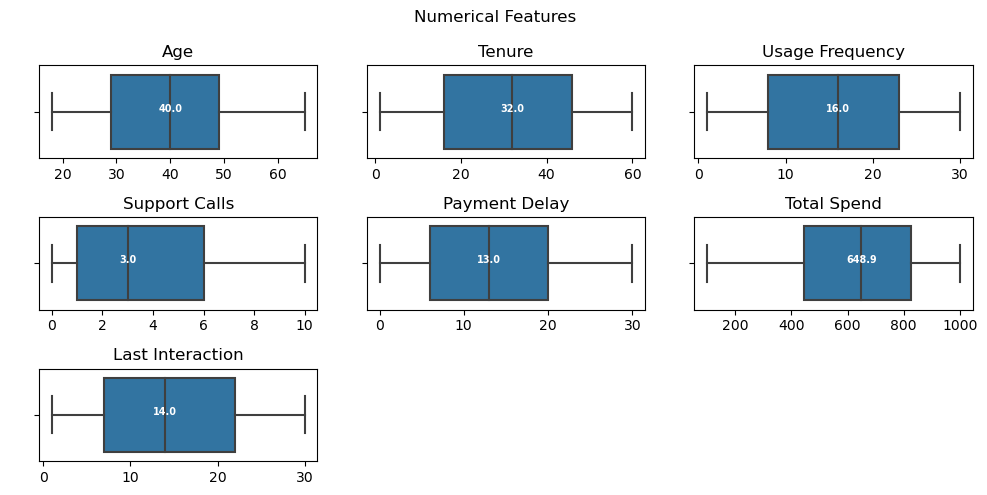

In [3]:
#checking numerical columns
col_features = df.select_dtypes(['float64' , 'int64'])
col_features = col_features[['Age', 'Tenure', 'Usage Frequency', 'Support Calls','Payment Delay', 'Total Spend', 'Last Interaction']]

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features')
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = col_features , x = j)
    #Calculate median
    median = df[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()

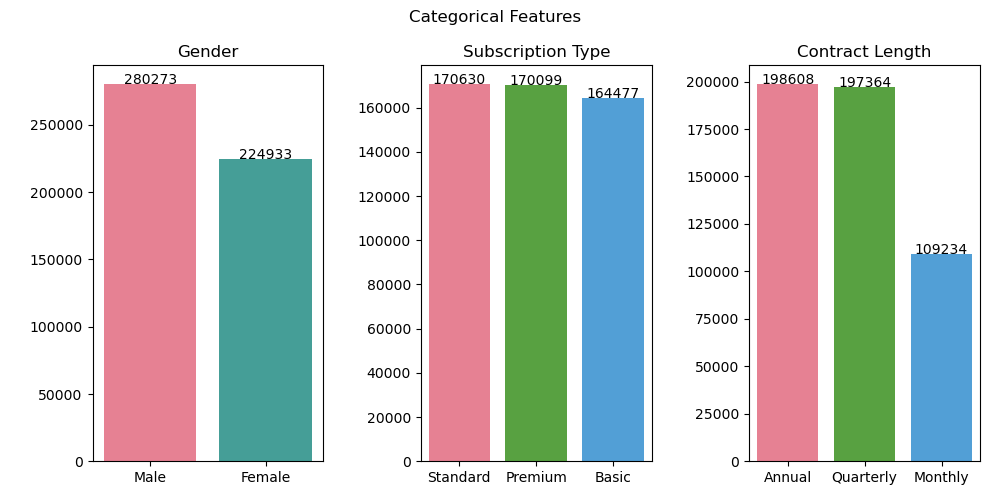

In [4]:
#checking categorical features
col_categorical = df.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features')
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = df[j].value_counts().sort_values(ascending = False).to_frame() ,x = df[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'husl' )
    #Create text
    text = df[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()

In [5]:
#checking for missing values
print('==== Complete Data ====')
print(df.isna().sum())

==== Complete Data ====
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [6]:
#only one missing value, therefore, it is deemed as sufficient to remove this for handling missing values 
#drop missing values
df.dropna(inplace=True)

In [7]:
# Dropping 'CustomerID'
# This variable does not yield any importance for our purpose
df.drop(columns='CustomerID', inplace=True)

Since we have multiple categorical variables, we will create dummy variables for these, possibly just do label encoding (still figuring out which is best)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Usage Frequency'}>],
       [<Axes: title={'center': 'Support Calls'}>,
        <Axes: title={'center': 'Payment Delay'}>,
        <Axes: title={'center': 'Total Spend'}>],
       [<Axes: title={'center': 'Last Interaction'}>,
        <Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

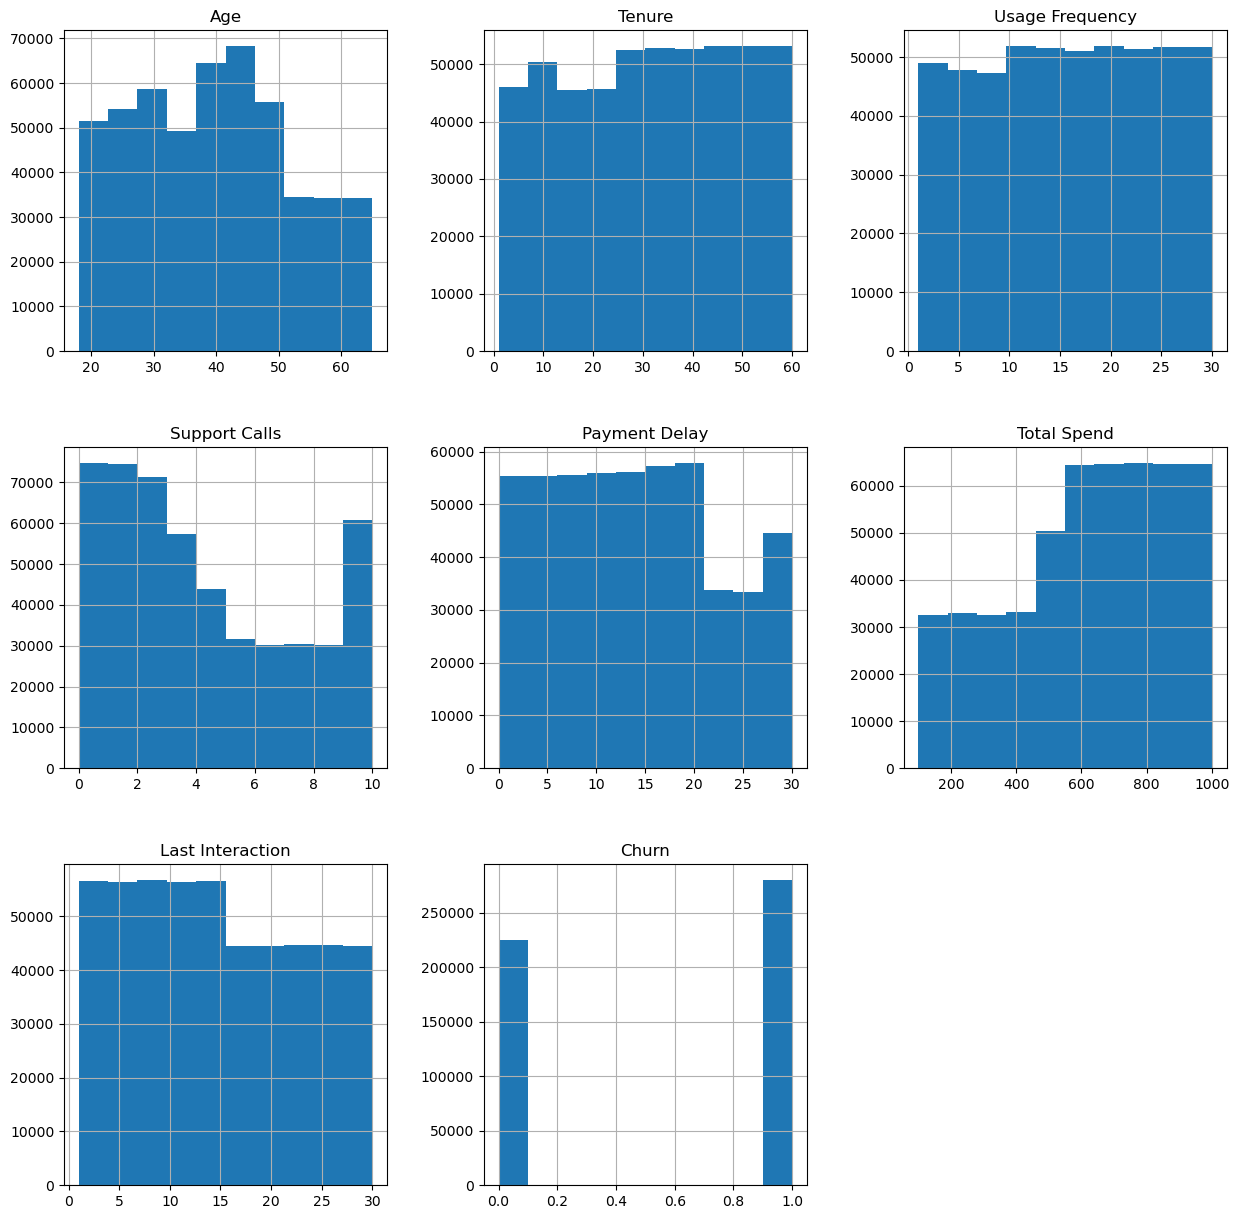

In [8]:
# Distribution with historgrams 
df.hist(bins=10, figsize=(15,15))

The Chrun Rate for XYZ Bank is: 55.52%


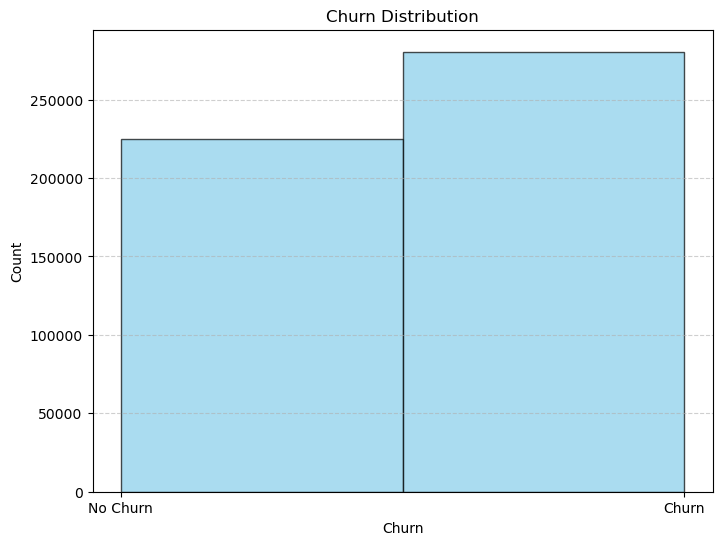

In [9]:
#churn rate
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
print('The Chrun Rate for XYZ Bank is: {:.2f}%'.format(churn))

#churn distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Churn'], bins=2, color=['skyblue'], edgecolor='black', alpha=0.7)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])  # Assuming 0 represents No Churn and 1 represents Churn
plt.title('Churn Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

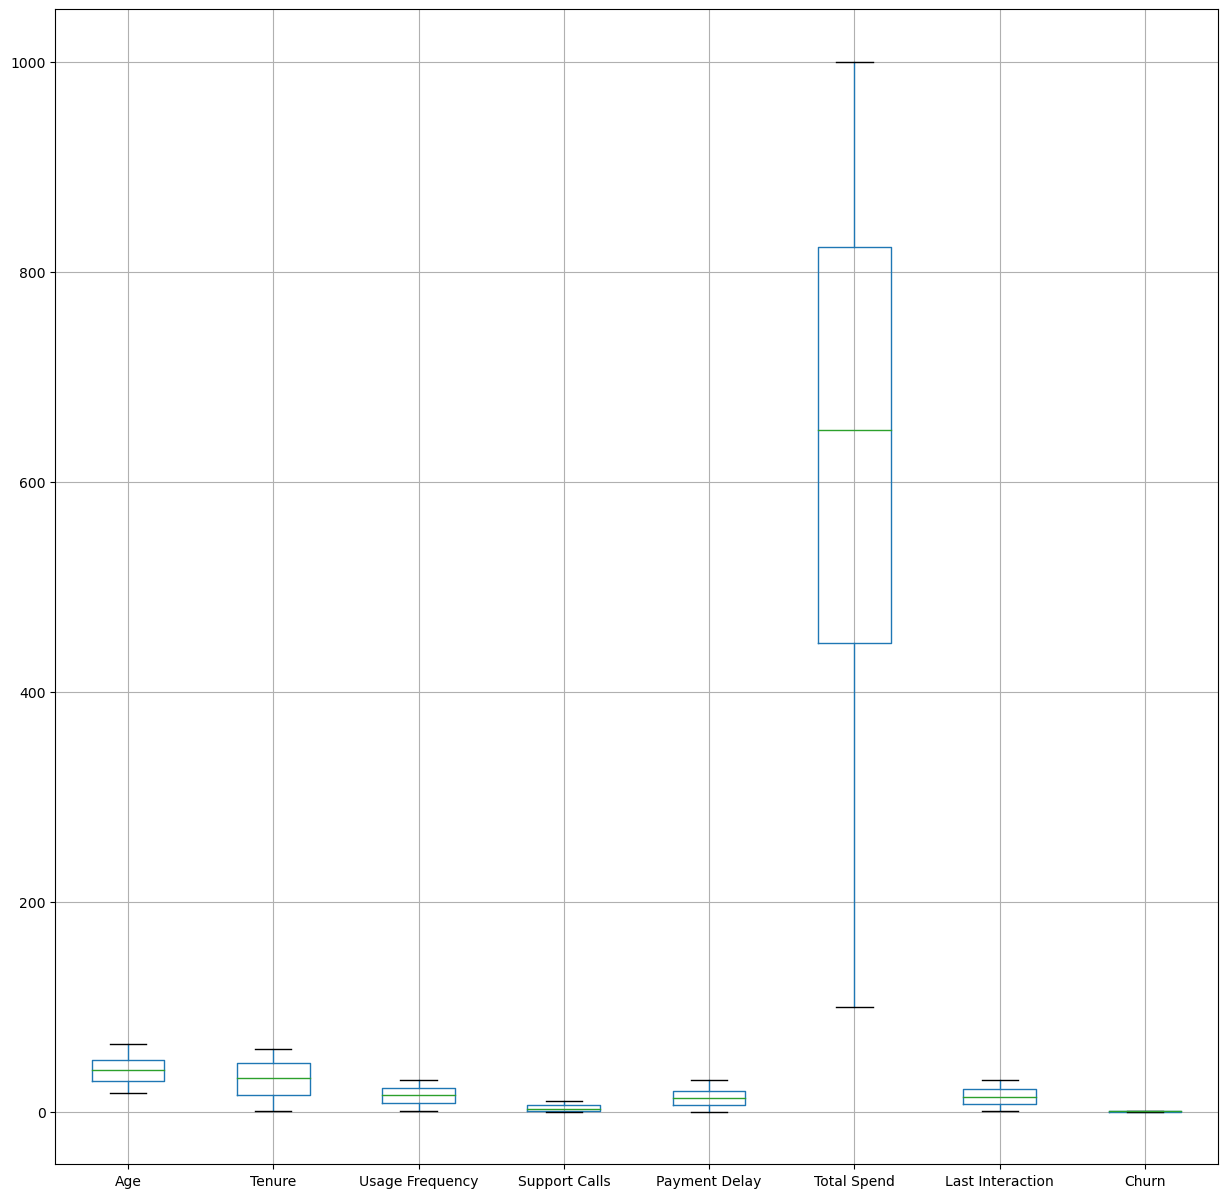

In [10]:
#outlier detection 
#box plot for visualising potential outliers
df.boxplot(figsize=(15,15))
plt.show()

There may be some outliers in 'Total Spend', we need to take this into consideration. 

Comment Johannes: Given the histogramm of total spend, I would say total spend has not necessarily outliers as there is a high density at the lower and upper end. It rather has a wide range. 

In [28]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


This shows that there is a gradual increase in the 'Total Spend' variable, which indicates that there are not outliers. 
Due to this, we will not take any action in removing the "outlier" displayed in the box plot, but keep it in mind when conducting further analysis. 

### Pattern Recognition

`Correlation Matrix` 

In [12]:
#correlation matrix to see which features are highly correlated to the churn feature
corr_matrix = df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

C:\Users\johan\AppData\Local\Temp\ipykernel_11444\2073776971.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Churn               1.000000
Support Calls       0.516283
Payment Delay       0.329785
Age                 0.191224
Last Interaction    0.127150
Tenure             -0.021308
Usage Frequency    -0.053263
Total Spend        -0.369682
Name: Churn, dtype: float64

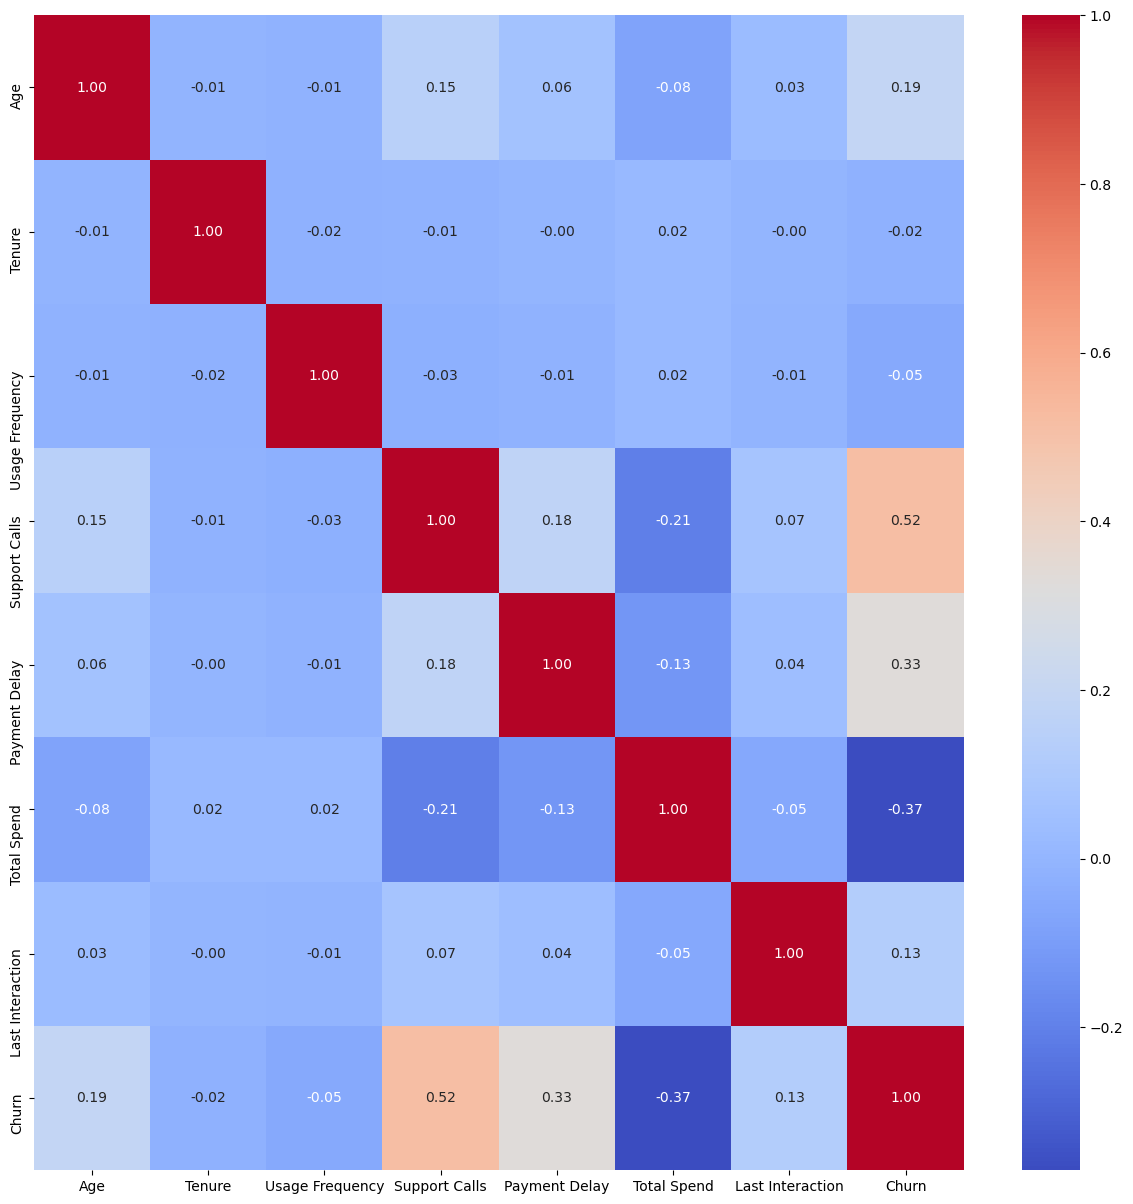

In [13]:
# Create a heatmap with blue color
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=f'.{decimal_places}f', cmap='coolwarm') 
plt.show()

`KMeans Clustering`

In [22]:
df_cluster = df.copy()
df_cluster.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [23]:
# Creating dummy variables for the categorical variables
df_cluster = pd.get_dummies(df_cluster, columns=['Subscription Type'], prefix='Subscription Type')
df_cluster = pd.get_dummies(df_cluster, columns=['Gender'], prefix='Gender')
df_cluster = pd.get_dummies(df_cluster, columns=['Contract Length'], prefix='Contract Length')

In [26]:

model = KMeans(n_clusters = 4)
model.fit(df_cluster)

c:\Users\johan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [29]:
def KmeansAndPlot(col1, col2, nClusters = 3):
    """
    Performs k-means clustering and plots the resulting clusters
    
    Arguments:
    col1, col2 -- columns to cluster and plot
    nClusters -- number of clusters to look for
    """
    # put the columns together into one dataframe
    X = pd.concat([col1, col2], axis = 1)
    # instantiate k-means
    km = KMeans(n_clusters = nClusters, random_state = 1)
    # run k-means
    km.fit(X)
    # obtain labels for the resulting clusters
    labels = km.labels_
    
    # plot the data, coloring points based on the cluster
    plt.scatter(col1, col2, c = labels, cmap = 'Set1')
    plt.title("K-means, {} clusters".format(nClusters))
    plt.xlabel(col1.name)
    plt.ylabel(col2.name)

In [31]:
KmeansAndPlot(df_cluster["Support Calls", "Churn", nClusters = 4)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

### Prediction

`Logistic Regression`

In [ ]:
df2 = df.copy()
df2.head()

In [ ]:
# Creating dummy variables for the categorical variables
df2 = pd.get_dummies(df2, columns=['Subscription Type'], prefix='Subscription Type')
df2 = pd.get_dummies(df2, columns=['Gender'], prefix='Gender')
df2 = pd.get_dummies(df2, columns=['Contract Length'], prefix='Contract Length')

In [ ]:
# Scaling the numerical features 
# Numerical features
num = df2[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
           'Payment Delay', 'Total Spend', 'Last Interaction']]

# Scaler 
scaler = StandardScaler()
scaled_num = scaler.fit_transform(num)  # Scale the numerical features

# Replace the original columns with scaled values
df2[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
     'Payment Delay', 'Total Spend', 'Last Interaction']] = scaled_num


df2.head()

In [ ]:
# Defining independet variables and target variable 
X = df2.drop(columns=['Churn'])
y = df2['Churn']

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state = 45)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
# Initialising Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [36]:
# Evaluation function that prints classification report and confusion matrix
def evaluate(y_test, y_pred, model_name):
    # Creating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Priting the model name
    print(f"\033[34m{model_name}\033[0m")

    # Print the classification report
    print(f" \033[32mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred))
    print(f" \033[32mConfusion Matrix:\033[0m")
    
    # Print the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Logistic Regression: Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

LogisticRegression()
 Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83     67430
         1.0       0.87      0.85      0.86     84132

    accuracy                           0.85    151562
   macro avg       0.85      0.85      0.85    151562
weighted avg       0.85      0.85      0.85    151562

 Confusion Matrix:


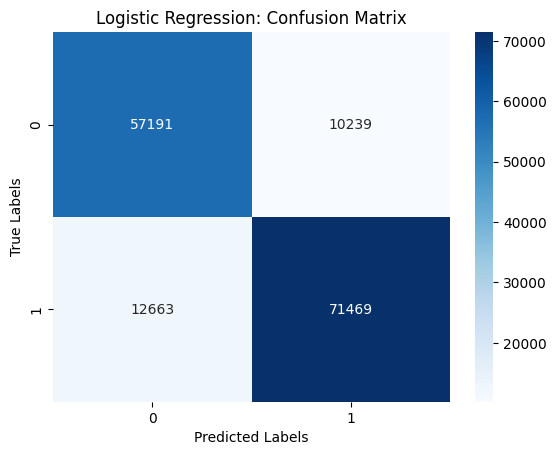

In [38]:
# Evaluating the results 
y_pred = lr.predict(X_test)
evaluate(y_test, y_pred, lr)

#### Feature importance

We will add feature importance once we decide on one 

#### Chrun Risk Ranking

In [41]:
# Predicted probabilities 
pred_prob = lr.predict_proba(X_test)[:, 1]

# Define churn risk boundaries 
boundaries = np.linspace(0,1,num=11) # 10 groups  

# Assigning customers to churn risk groups 
churn_risk_groups = np.digitize(pred_prob, boundaries)
X_test['Churn Risk'] = churn_risk_groups

   Churn Risk Bucket  Number of Customers
0                  1                18637
1                  2                20165
2                  3                13527
3                  4                 9678
4                  5                 7847
5                  6                 7273
6                  7                 7655
7                  8                 9450
8                  9                14604
9                 10                42726


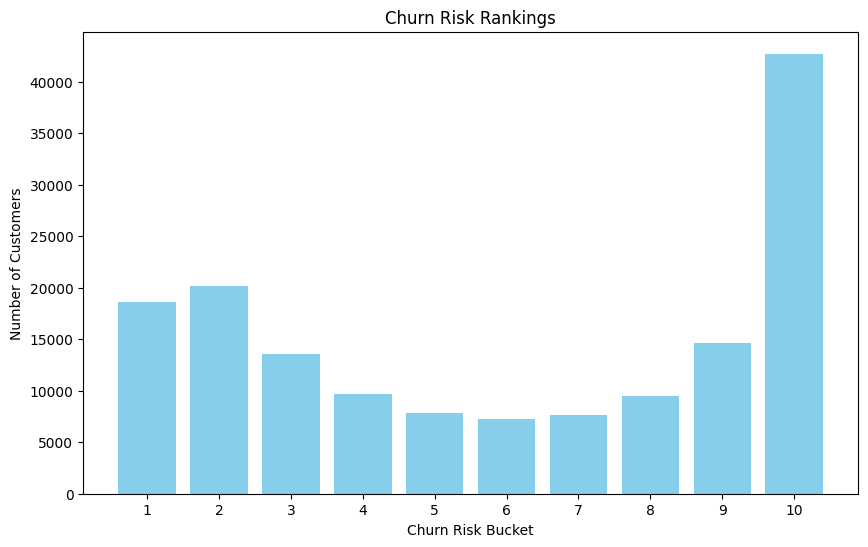

In [45]:
# Creating a Dataframe to store rankings 
churn_risk_df = pd.DataFrame({'CustomerID': X_test.index, 'Churn Risk': churn_risk_groups})

# Count the number of customers in each bucket
group_counts = churn_risk_df['Churn Risk'].value_counts().sort_index()

# Create a table to display churn risk rankings
churn_risk_table = pd.DataFrame({'Churn Risk Bucket': group_counts.index, 'Number of Customers': group_counts.values})

# Sort the table by churn risk bucket
churn_risk_table = churn_risk_table.sort_values(by='Churn Risk Bucket')

# Display the churn risk table
print(churn_risk_table)

# Create a bar chart to visualize churn risk rankings
plt.figure(figsize=(10, 6))
plt.bar(churn_risk_table['Churn Risk Bucket'], churn_risk_table['Number of Customers'], color='skyblue')
plt.xlabel('Churn Risk Bucket')
plt.ylabel('Number of Customers')
plt.title('Churn Risk Rankings')
plt.xticks(churn_risk_table['Churn Risk Bucket'])
plt.show()

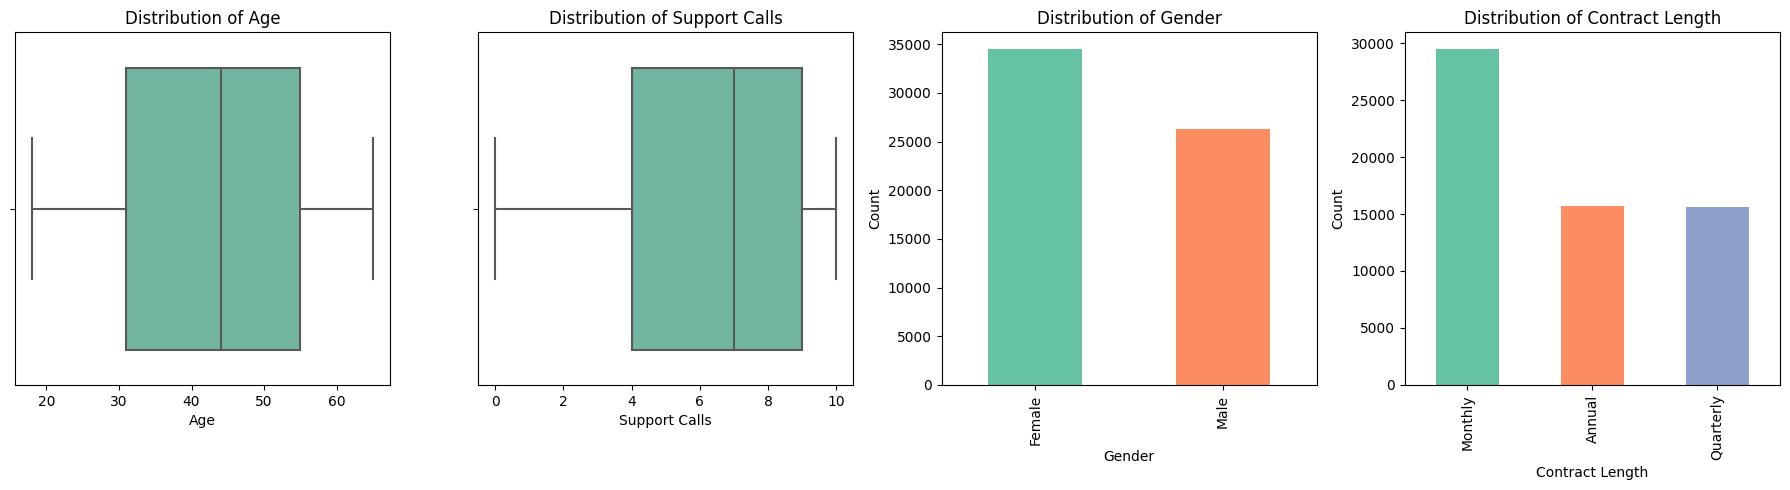

In [46]:
# Define a custom color palette with distinct colors for all categories
custom_palette = sns.color_palette("Set2")

# Find customers in rank 10 (highest churn risk)
rank_10_customers = churn_risk_df[churn_risk_df['Churn Risk'] == 10]

# Get the indices of these customers
rank_10_indices = rank_10_customers['CustomerID']

# Select numerical and categorical features to analyze
numerical_features = ['Age', 'Support Calls']
categorical_features = ['Gender', 'Contract Length']

# Create subplots for visualizing features
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features) + len(categorical_features), figsize=(18, 5))

# Plot each numerical feature using box plots
for i, feature in enumerate(numerical_features):
    # Create a box plot for the numerical feature
    sns.boxplot(x=feature, data=df.loc[rank_10_indices], ax=axes[i], color=custom_palette[0])
    axes[i].set_title(f'Distribution of {feature}')

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    # Calculate the distribution of values for the feature in the original dataset
    feature_distribution = df.loc[rank_10_indices, feature].value_counts()
    
    # Create a bar chart for the feature
    if feature == 'Gender':
        # For 'Gender,' use a bar chart and specify custom colors
        feature_distribution.plot(kind='bar', ax=axes[len(numerical_features) + i], color=custom_palette)
        axes[len(numerical_features) + i].set_xlabel(feature)
        axes[len(numerical_features) + i].set_ylabel('Count')
        axes[len(numerical_features) + i].set_title(f'Distribution of {feature}')
    elif len(feature_distribution) <= 2:
        # For binary features like "Contract Length," use a pie chart
        axes[len(numerical_features) + i].pie(feature_distribution, labels=feature_distribution.index, autopct='%1.1f%%', startangle=90)
        axes[len(numerical_features) + i].set_title(f'Distribution of {feature}')
    else:
        # For features with more than two categories, use a bar chart
        feature_distribution.plot(kind='bar', ax=axes[len(numerical_features) + i], color=custom_palette)
        axes[len(numerical_features) + i].set_xlabel(feature)
        axes[len(numerical_features) + i].set_ylabel('Count')
        axes[len(numerical_features) + i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()